In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
#import food production data
df = "/content/drive/MyDrive/HamoyeInternship/Stage D/Africa Food Production (2004 - 2013).csv"
prod = pd.read_csv(df, encoding='latin-1')
prod.head()


Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111

In [9]:
prod["Production_Quantity"] = prod["Value"]
prod = prod.drop("Value",axis=1)
prod.head(10)

Country                Item  Year  Production_Quantity
0  Algeria  Wheat and products  2004                 2731
1  Algeria  Wheat and products  2005                 2415
2  Algeria  Wheat and products  2006                 2688
3  Algeria  Wheat and products  2007                 2319
4  Algeria  Wheat and products  2008                 1111
5  Algeria  Wheat and products  2009                 2953
6  Algeria  Wheat and products  2010                 2605
7  Algeria  Wheat and products  2011                 2555
8  Algeria  Wheat and products  2012                 3432
9  Algeria  Wheat and products  2013                 3299

In [10]:
prod.head()

Country                Item  Year  Production_Quantity
0  Algeria  Wheat and products  2004                 2731
1  Algeria  Wheat and products  2005                 2415
2  Algeria  Wheat and products  2006                 2688
3  Algeria  Wheat and products  2007                 2319
4  Algeria  Wheat and products  2008                 1111

In [11]:
items = prod["Item"].unique()
len(items)

94

In [15]:
conts = sup["Country"].unique()
print(len(conts))

45


In [ ]:
prod.shape

(23110, 4)

In [14]:
#import food supply data
sup = pd.read_csv("/content/drive/MyDrive/HamoyeInternship/Stage D/Africa Food Supply (2004 - 2013).csv")
sup.head()

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Data Storytelling
**Trend in food production and supply over the years**

*Trend in foood production*

In [16]:
prod.head()

Country                Item  Year  Production_Quantity
0  Algeria  Wheat and products  2004                 2731
1  Algeria  Wheat and products  2005                 2415
2  Algeria  Wheat and products  2006                 2688
3  Algeria  Wheat and products  2007                 2319
4  Algeria  Wheat and products  2008                 1111

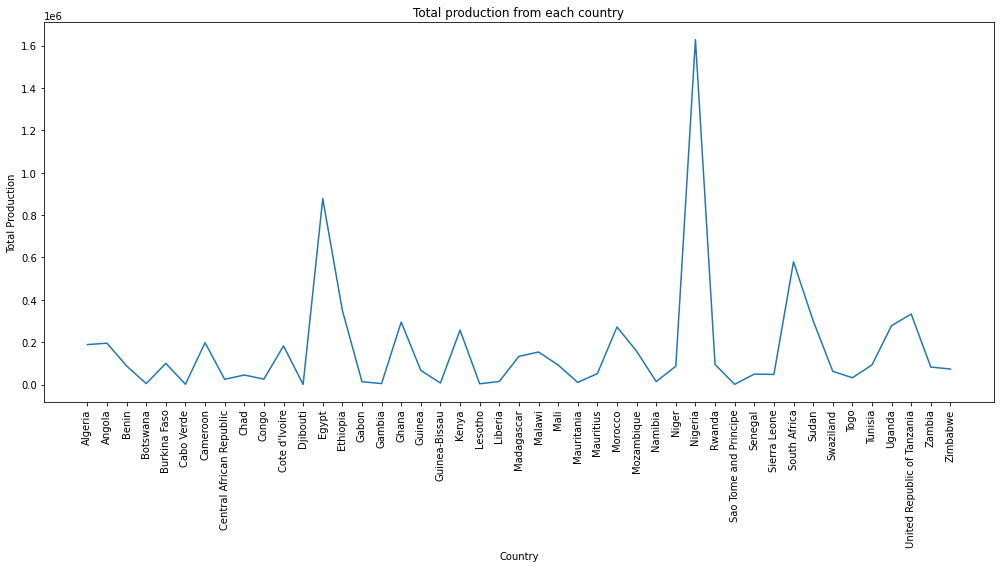

In [80]:
plt.figure(figsize=(14,8))
n = prod.groupby("Country")["Production_Quantity"].sum()
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Production")
plt.title("Total production from each country")
plt.plot(n)
plt.tight_layout()
plt.show()

### Rice

In [22]:
prod["Item"].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

In [18]:
rice = prod.loc[prod["Item"] == "Rice (Milled Equivalent)"]
rice.head()

Country                      Item  Year  Production_Quantity
10  Algeria  Rice (Milled Equivalent)  2004                    0
11  Algeria  Rice (Milled Equivalent)  2005                    0
12  Algeria  Rice (Milled Equivalent)  2006                    0
13  Algeria  Rice (Milled Equivalent)  2007                    0
14  Algeria  Rice (Milled Equivalent)  2008                    0

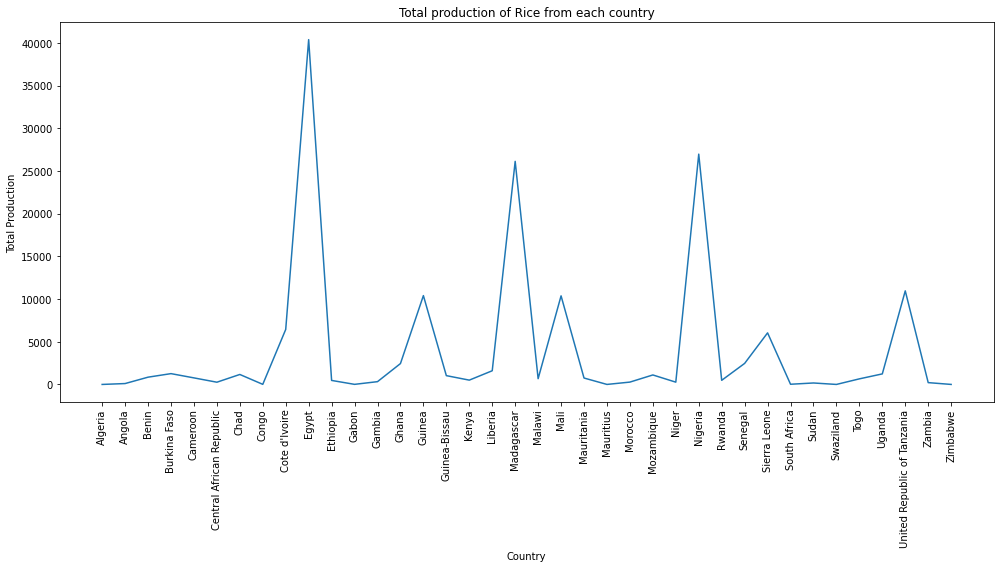

In [19]:
plt.figure(figsize=(14,8))
n = rice.groupby("Country")["Production_Quantity"].sum()
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Production")
plt.title("Total production of Rice from each country")
plt.plot(n)
plt.tight_layout()
plt.show()

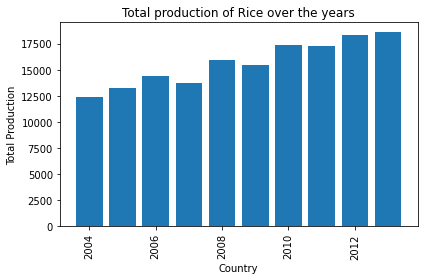

In [20]:
n = np.array(rice.groupby("Year")["Production_Quantity"].sum())
years = np.arange(2004,2014)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Production")
plt.title("Total production of Rice over the years")
plt.bar(years,n)
plt.tight_layout()
plt.show()

In [23]:
prod.groupby(["Country","Item"])[["Production_Quantity"]].sum()

Production_Quantity
Country  Item                                      
Algeria  Apples and products                   3003
         Bananas                                  0
         Barley and products                  12770
         Beans                                   11
         Beer                                  1358
...                                             ...
Zimbabwe Tea (including mate)                   197
         Tomatoes and products                  204
         Vegetables, Other                     1749
         Wheat and products                     996
         Wine                                    20

[2312 rows x 1 columns]

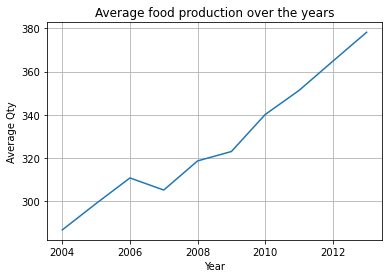

In [24]:
#Trend in average food productions over the year
mean_values = np.array(prod.groupby("Year")["Production_Quantity"].mean()) #Grouping mean supply for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Average food production over the years")
plt.xlabel("Year")
plt.ylabel("Average Qty")
plt.plot(years,mean_values)
plt.grid()
plt.show()




Comment:

### Trend in total food production over the years in the specified countries

In [25]:
Countries = prod["Country"].unique()
all_values = []
for Country in Countries:
  df_c = prod.loc[prod["Country"]== Country]
  x = df_c.groupby(["Year"])["Production_Quantity"].sum()
  x = np.array(list(x))
  all_values.append(x)

In [26]:
len(all_values)

45

In [27]:
for cont in prod["Country"].unique():
  


SyntaxError: ignored

<Figure size 1440x576 with 0 Axes>

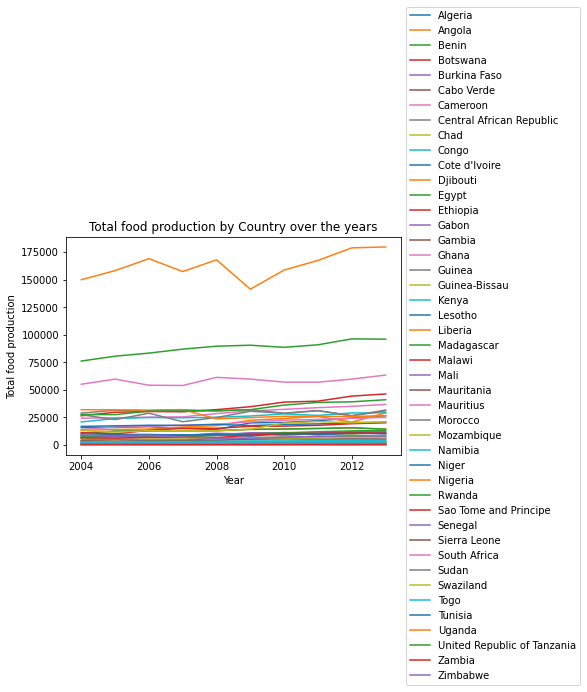

In [79]:
plt.figure(figsize =(20, 8))
fig, ax = plt.subplots()
ax.plot(years, all_values[0], label = Countries[0])
ax.plot(years, all_values[1],label=Countries[1])
ax.plot(years, all_values[2],label=Countries[2])
ax.plot(years, all_values[3],label=Countries[3])
ax.plot(years, all_values[4],label=Countries[4])
ax.plot(years, all_values[5],label=Countries[5])
ax.plot(years, all_values[6],label=Countries[6])
ax.plot(years, all_values[7],label=Countries[7])
ax.plot(years, all_values[8],label=Countries[8])
ax.plot(years, all_values[9],label=Countries[9])
ax.plot(years, all_values[10],label=Countries[10])
ax.plot(years, all_values[11],label=Countries[11])
ax.plot(years, all_values[12],label=Countries[12])
ax.plot(years, all_values[13],label=Countries[13])
ax.plot(years, all_values[14],label=Countries[14])
ax.plot(years, all_values[15],label=Countries[15])
ax.plot(years, all_values[16],label=Countries[16])
ax.plot(years, all_values[17],label=Countries[17])
ax.plot(years, all_values[18],label=Countries[18])
ax.plot(years, all_values[19],label=Countries[19])
ax.plot(years, all_values[20],label=Countries[20])
ax.plot(years, all_values[22],label=Countries[21])
ax.plot(years, all_values[22],label=Countries[22])
ax.plot(years, all_values[23],label=Countries[23])
ax.plot(years, all_values[24],label=Countries[24])
ax.plot(years, all_values[25],label=Countries[25])
ax.plot(years, all_values[26],label=Countries[26])
ax.plot(years, all_values[27],label=Countries[27])
ax.plot(years, all_values[28],label=Countries[28])
ax.plot(years, all_values[29],label=Countries[29])
ax.plot(years, all_values[30],label=Countries[30])
ax.plot(years, all_values[31],label=Countries[31])
ax.plot(years, all_values[32],label=Countries[32])
ax.plot(years, all_values[33],label=Countries[33])
ax.plot(years, all_values[34],label=Countries[34])
ax.plot(years, all_values[35],label=Countries[35])
ax.plot(years, all_values[36],label=Countries[36])
ax.plot(years, all_values[37],label=Countries[37])
ax.plot(years, all_values[38],label=Countries[38])
ax.plot(years, all_values[39],label=Countries[39])
ax.plot(years, all_values[40],label=Countries[40])
ax.plot(years, all_values[41],label=Countries[41])
ax.plot(years, all_values[42],label=Countries[42])
ax.plot(years, all_values[43],label=Countries[43])
ax.plot(years, all_values[44],label=Countries[44])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total food production by Country over the years")
plt.xlabel("Year")
plt.ylabel("Total food production")
plt.show()

Comment:

### Distribution of food prodution

In [30]:
prod.describe()

Year  Production_Quantity
count  23110.000000         23110.000000
mean    2008.498269           327.785201
std        2.871740          1607.940343
min     2004.000000             0.000000
25%     2006.000000             3.000000
50%     2008.000000            18.000000
75%     2011.000000           108.000000
max     2013.000000         54000.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdebc7a6250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdebc7a61d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdebc8fcf50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdebc84e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdebc84ec50>],
 'means': []}

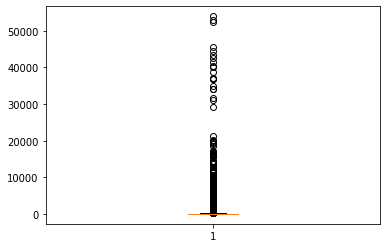

In [31]:
plt.boxplot(prod["Production_Quantity"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


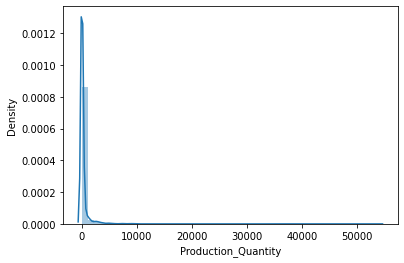

In [32]:
sns.distplot(prod["Production_Quantity"])

In [33]:

mean = prod["Production_Quantity"].mean()
median = prod["Production_Quantity"].median()
lower_quart = np.percentile(prod["Production_Quantity"],25)
upper_quart = np.percentile(prod["Production_Quantity"],75)
iqr = upper_quart - lower_quart
lower_fence = lower_quart - (1.5 * iqr)
upper_fence = upper_quart + (1.5 * iqr)
outliers = []
for val in prod["Production_Quantity"]:
  if (val < lower_fence) or (val > upper_fence):
    outliers.append(val)

print(len(outliers))


3696


In [34]:
#Filters data frame with just outliers
out_df = prod.loc[prod["Production_Quantity"].isin(outliers)]
out_df.head()

Country                Item  Year  Production_Quantity
0  Algeria  Wheat and products  2004                 2731
1  Algeria  Wheat and products  2005                 2415
2  Algeria  Wheat and products  2006                 2688
3  Algeria  Wheat and products  2007                 2319
4  Algeria  Wheat and products  2008                 1111

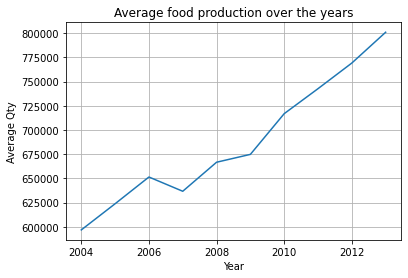

In [35]:
#Trend in average food productions over the year
mean_values = np.array(out_df.groupby("Year")["Production_Quantity"].sum()) #Grouping mean supply for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Average food production over the years")
plt.xlabel("Year")
plt.ylabel("Average Qty")
plt.plot(years,mean_values)
plt.grid()
plt.show()

### Items

In [36]:
prod.head()

Country                Item  Year  Production_Quantity
0  Algeria  Wheat and products  2004                 2731
1  Algeria  Wheat and products  2005                 2415
2  Algeria  Wheat and products  2006                 2688
3  Algeria  Wheat and products  2007                 2319
4  Algeria  Wheat and products  2008                 1111

In [37]:
milk_but = prod.loc[prod["Item"] == "Milk - Excluding Butter"]
milk_but.head()

Country                     Item  Year  Production_Quantity
500  Algeria  Milk - Excluding Butter  2004                 1701
501  Algeria  Milk - Excluding Butter  2005                 1799
502  Algeria  Milk - Excluding Butter  2006                 2017
503  Algeria  Milk - Excluding Butter  2007                 1999
504  Algeria  Milk - Excluding Butter  2008                 1998

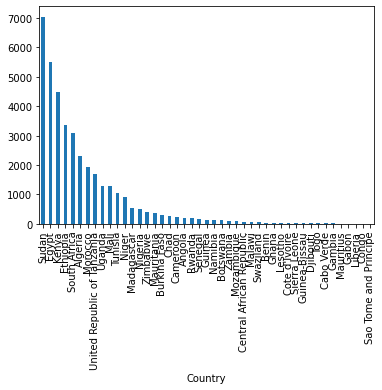

In [39]:
#Which country has the highest mean  production of Milk - Excluding Butter
milk_g = milk_but.groupby("Country")["Production_Quantity"].mean().sort_values(ascending=False).plot.bar()
milk_g




In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 16.7 MB 45.7 MB/s 
     |████████████████████████████████| 6.3 MB 47.4 MB/s 


In [40]:
# import geopandas as gpd
# world = gpd.read_file("/content/drive/MyDrive/Hamoye Internship/joy/Africa Food Production (2004 - 2013).csv")
# world.head()

In [41]:
# from geopy.exc import GeocoderTimedOut
# from geopy.geocoders import Nominatim
   
# # declare an empty list to store
# # latitude and longitude of values 
# # of city column
# longitude = []
# latitude = []
   
# # function to find the coordinate
# # of a given city 
# def findGeocode(city):
       
#     # try and catch is used to overcome
#     # the exception thrown by geolocator
#     # using geocodertimedout  
#     try:
          
#         # Specify the user_agent as your
#         # app name it should not be none
#         geolocator = Nominatim(user_agent="your_app_name")
          
#         return geolocator.geocode(city)
      
#     except GeocoderTimedOut:
          
#         return findGeocode(city)    
  
# # each value from city column
# # will be fetched and sent to
# # function find_geocode   
# for i in (prod["Country"].unique()):
      
#     if findGeocode(i) != None:
           
#         loc = findGeocode(i)
          
#         # coordinates returned from 
#         # function is stored into
#         # two separate list
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)
       
#     # if coordinate for a city not
#     # found, insert "NaN" indicating 
#     # missing value 
#     else:
#         latitude.append(np.nan)
#         longitude.append(np.nan)


In [42]:
# countries = prod["Country"].unique()

In [43]:
# lat_dic = {countries[i]: latitude[i] for i in range(len(countries))}
# long_dic = {countries[i]: longitude[i] for i in range(len(countries))}
 


In [45]:
# lat_dic["Ghana"]

In [46]:
# prod = prod.drop("Longitude",axis=1)

In [47]:
# world["Latitude"] = prod["Country"].apply(lambda x : lat_dic[x])
# world.head()


In [48]:
# world["Longitude"] = prod["Country"].apply(lambda x : long_dic[x])
# world.head()


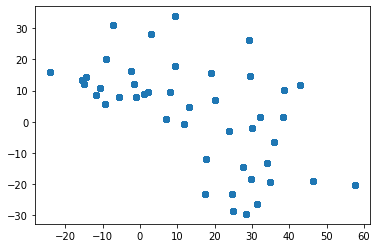

In [ ]:
plt.scatter(x=world['Longitude'], y=world['Latitude'])
plt.show()

In [49]:
# import pandas as pd
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame
# # creating a geometry column 
# geometry = [Point(xy) for xy in zip(world['Longitude'], world['Latitude'])]
# # Coordinate reference system : WGS84
# crs = {'init': 'epsg:4326'}
# # Creating a Geographic data frame 
# gdf = gpd.GeoDataFrame(world, crs=crs, geometry=geometry)

In [ ]:
world.head()

Country                Item  Year Value                  geometry  \
0  Algeria  Wheat and products  2004  2731  POINT (2.99998 28.00003)   
1  Algeria  Wheat and products  2005  2415  POINT (2.99998 28.00003)   
2  Algeria  Wheat and products  2006  2688  POINT (2.99998 28.00003)   
3  Algeria  Wheat and products  2007  2319  POINT (2.99998 28.00003)   
4  Algeria  Wheat and products  2008  1111  POINT (2.99998 28.00003)   

    Latitude  Longitude  
0  28.000027   2.999983  
1  28.000027   2.999983  
2  28.000027   2.999983  
3  28.000027   2.999983  
4  28.000027   2.999983

In [ ]:
africa_json_no_id = world.to_json(drop_id=True)
africa_json_no_id

'{"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"Country": "Algeria", "Item": "Wheat and products", "Latitude": 28.0000272, "Longitude": 2.9999825, "Value": "2731", "Year": "2004"}, "geometry": {"type": "Point", "coordinates": [2.9999825, 28.0000272]}}, {"type": "Feature", "properties": {"Country": "Algeria", "Item": "Wheat and products", "Latitude": 28.0000272, "Longitude": 2.9999825, "Value": "2415", "Year": "2005"}, "geometry": {"type": "Point", "coordinates": [2.9999825, 28.0000272]}}, {"type": "Feature", "properties": {"Country": "Algeria", "Item": "Wheat and products", "Latitude": 28.0000272, "Longitude": 2.9999825, "Value": "2688", "Year": "2006"}, "geometry": {"type": "Point", "coordinates": [2.9999825, 28.0000272]}}, {"type": "Feature", "properties": {"Country": "Algeria", "Item": "Wheat and products", "Latitude": 28.0000272, "Longitude": 2.9999825, "Value": "2319", "Year": "2007"}, "geometry": {"type": "Point", "coordinates": [2.9999825, 28.0000

In [50]:
# x_map=world.centroid.x.mean()
# y_map=world.centroid.y.mean()
# print(x_map,y_map)

In [51]:
# import pandas as pd
# import geopandas as gpd
# import folium
# import branca.colormap as cm

In [52]:
# mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
# folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
# mymap

In [53]:
"""myscale = (world['Value'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
mymap.choropleth(
 geo_data=world,
 name='Choropleth',
 data=world,
 columns=['ID_NIL','Value'],
 key_on="feature.properties.ID_NIL",
 fill_color='YlGnBu',
 threshold_scale=myscale,
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Resident foreign population in %',
 smooth_factor=0
)
mymap"""

'myscale = (world[\'Value\'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()\nmymap.choropleth(\n geo_data=world,\n name=\'Choropleth\',\n data=world,\n columns=[\'ID_NIL\',\'Value\'],\n key_on="feature.properties.ID_NIL",\n fill_color=\'YlGnBu\',\n threshold_scale=myscale,\n fill_opacity=1,\n line_opacity=0.2,\n legend_name=\'Resident foreign population in %\',\n smooth_factor=0\n)\nmymap'

### Supply

In [ ]:
sup.head()

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

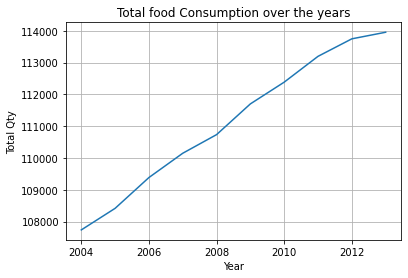

In [54]:
#Trend in average food productions over the year
mean_values_prod = np.array(sup.groupby("Year")["Value"].sum()) #Grouping mean supply for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Total food Consumption over the years")
plt.xlabel("Year")
plt.ylabel("Total Qty")
plt.plot(years,mean_values_prod)
plt.grid()
plt.show()

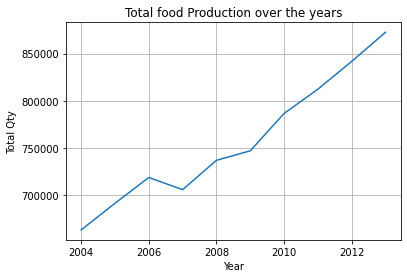

In [62]:
#Trend in average food productions over the year
mean_values_prod = np.array(prod.groupby("Year")["Production_Quantity"].sum()) #Grouping total Production for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Total food Production over the years")
plt.xlabel("Year")
plt.ylabel("Total Qty")
plt.plot(years,mean_values_prod)
plt.grid()
plt.show()

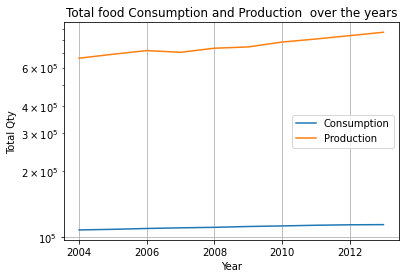

In [65]:
#Trend in average food productions over the year
mean_values = np.array(sup.groupby("Year")["Value"].sum()) #Grouping mean supply for every year
mean_values_prod = np.array(prod.groupby("Year")["Production_Quantity"].sum()) 
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Total food Consumption and Production  over the years")
plt.xlabel("Year")
plt.ylabel("Total Qty")
plt.yscale("log")
plt.plot(years,mean_values,label="Consumption")
plt.plot(years,mean_values_prod,label="Production")
#plt.plot(years,mean_values_prod)
plt.grid()
plt.legend()
plt.show()

### Average food production for each year

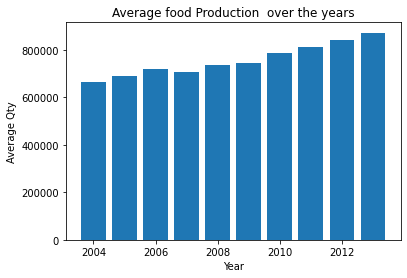

In [69]:
mean_values_prod = np.array(prod.groupby("Year")["Production_Quantity"].sum()) #Grouping total Production for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Average food Production  over the years")
plt.xlabel("Year")
plt.ylabel("Average Qty")
plt.bar(years,mean_values_prod)
plt.show()

### Average food Consumption for each year

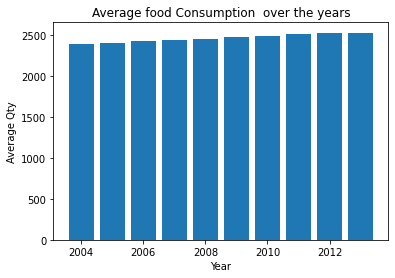

In [68]:
mean_values_sup= np.array(sup.groupby("Year")["Value"].mean()) #Grouping mean supply for every year
years = np.arange(2004,2014)
#Visualize
#plt.xlim([2004, 2013])
plt.title("Average food Consumption  over the years")
plt.xlabel("Year")
plt.ylabel("Average Qty")
plt.bar(years,mean_values_sup)
plt.show()

In [70]:
df = pd.DataFrame()
df["Year"] = years
df["Consumption"] = mean_values
df["Production"] = mean_values_prod
df.head()

Year  Consumption  Production
0  2004       107740      663006
1  2005       108418      691257
2  2006       109386      718602
3  2007       110149      705659
4  2008       110734      736804

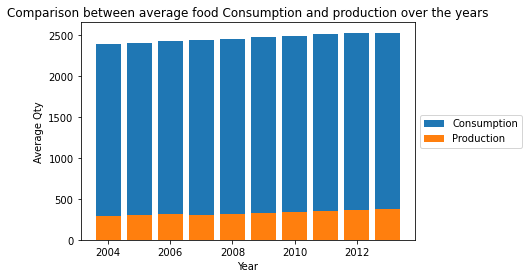

In [74]:
mean_values_sup= np.array(sup.groupby("Year")["Value"].mean()) #Grouping mean supply for every year
years = np.arange(2004,2014)
mean_values_prod = np.array(prod.groupby("Year")["Production_Quantity"].mean())
#Visualize
#plt.xlim([2004, 2013])
plt.title("Comparison between average food Consumption and production over the years")
plt.xlabel("Year")
plt.ylabel("Average Qty")
plt.bar(years,mean_values_sup,label="Consumption")
plt.bar(years,mean_values_prod,label="Production")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Quiz Solution

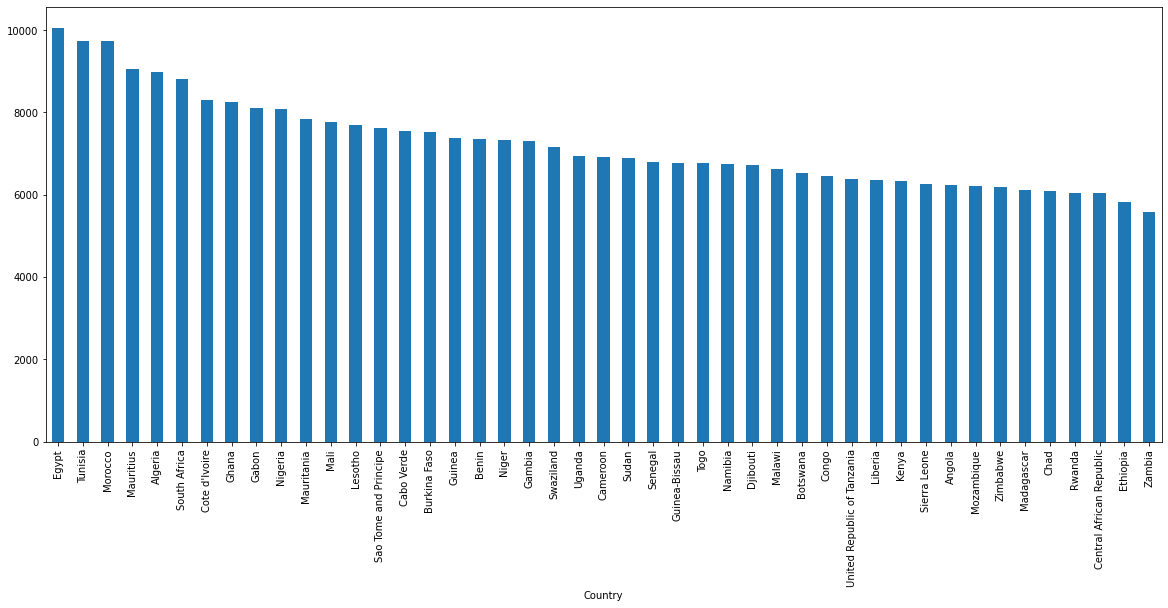

In [75]:
#q2
plt.figure(figsize=(20,8))
year1 = sup[sup["Year"].isin([2004,2005,2006])]
year1.groupby("Country")["Value"].sum().sort_values(ascending=False).plot.bar()

In [77]:
#q3
oat = prod.loc[prod["Year"] == 2010]
oat = oat.loc[oat["Item"]=="Oats"]
oat.head()

Country  Item  Year  Production_Quantity
46      Algeria  Oats  2010                   88
6406   Ethiopia  Oats  2010                   48
7746      Ghana  Oats  2010                    0
9286      Kenya  Oats  2010                    3
10026   Lesotho  Oats  2010                    0

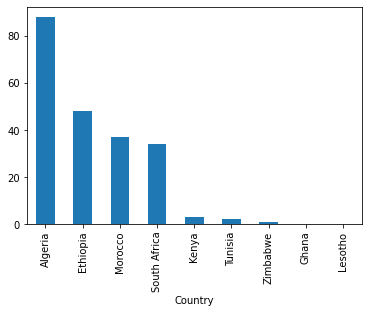

In [78]:
oat.groupby("Country")["Production_Quantity"].sum().sort_values(ascending=False).plot.bar()